In [121]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from keras import models 

In [122]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [123]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32')
X_test = X_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [124]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [125]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')])
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [126]:
data = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=128,verbose=1,validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 12s 42ms/step - loss: 0.5701 - acc: 0.7994 - val_loss: 0.3907 - val_acc: 0.8613
Epoch 2/20
274/274 [==============================] - 11s 41ms/step - loss: 0.3389 - acc: 0.8793 - val_loss: 0.3203 - val_acc: 0.8849
Epoch 3/20
274/274 [==============================] - 11s 42ms/step - loss: 0.2869 - acc: 0.8968 - val_loss: 0.3116 - val_acc: 0.8863
Epoch 4/20
274/274 [==============================] - 12s 45ms/step - loss: 0.2505 - acc: 0.9088 - val_loss: 0.2978 - val_acc: 0.8921
Epoch 5/20
274/274 [==============================] - 12s 44ms/step - loss: 0.2239 - acc: 0.9179 - val_loss: 0.2781 - val_acc: 0.8994
Epoch 6/20
274/274 [==============================] - 12s 43ms/step - loss: 0.2002 - acc: 0.9280 - val_loss: 0.3455 - val_acc: 0.8745
Epoch 7/20
274/274 [==============================] - 11s 41ms/step - loss: 0.1834 - acc: 0.9325 - val_loss: 0.2985 - val_acc: 0.8991
Epoch 8/20
274/274 [==============================] - 11s 41ms

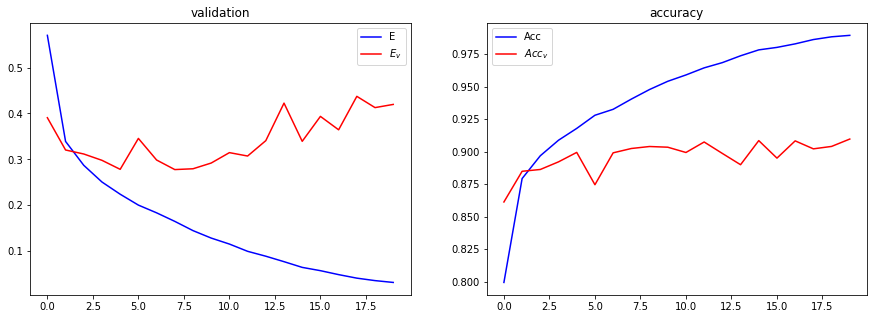

In [127]:
data_dict = data.history
loss = data_dict['loss']
data_loss = data_dict['val_loss']
acc = data_dict['acc']
val_acc = data_dict['val_acc']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss,'b-',label='E')
plt.plot(data_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc,'b-',label='Acc')
plt.plot(val_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [130]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4538 - acc: 0.9054


In [118]:
model2 = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(64, activation='relu'),
  Dropout(0.25),
  Dense(10, activation='softmax')])
model2.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [119]:
data2 = model2.fit(partial_X_train,partial_y_train,epochs=20,batch_size=128,verbose=1,validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 12s 44ms/step - loss: 0.7000 - acc: 0.7538 - val_loss: 0.3962 - val_acc: 0.8593
Epoch 2/20
274/274 [==============================] - 11s 41ms/step - loss: 0.4076 - acc: 0.8569 - val_loss: 0.3252 - val_acc: 0.8831
Epoch 3/20
274/274 [==============================] - 12s 43ms/step - loss: 0.3436 - acc: 0.8794 - val_loss: 0.3096 - val_acc: 0.8857
Epoch 4/20
274/274 [==============================] - 11s 42ms/step - loss: 0.3072 - acc: 0.8918 - val_loss: 0.2844 - val_acc: 0.8938
Epoch 5/20
274/274 [==============================] - 12s 44ms/step - loss: 0.2771 - acc: 0.9018 - val_loss: 0.2793 - val_acc: 0.8989
Epoch 6/20
274/274 [==============================] - 12s 42ms/step - loss: 0.2576 - acc: 0.9069 - val_loss: 0.2678 - val_acc: 0.9017
Epoch 7/20
274/274 [==============================] - 11s 42ms/step - loss: 0.2386 - acc: 0.9138 - val_loss: 0.2613 - val_acc: 0.9087
Epoch 8/20
274/274 [==============================] - 11s 42ms

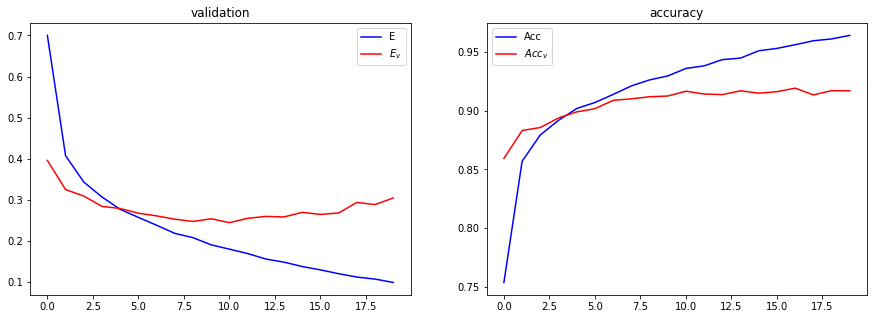

In [120]:
data2_dict = data2.history
loss2 = data2_dict['loss']
data2_loss = data2_dict['val_loss']
acc2 = data2_dict['acc']
val2_acc = data2_dict['val_acc']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss2,'b-',label='E')
plt.plot(data2_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc2,'b-',label='Acc')
plt.plot(val2_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [129]:
test_loss, test_acc = model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3241 - acc: 0.9119


총 6만개의 데이터 셋 중 5만개를 train, 1만개를 val셋으로 나누었다. val 셋을 학습시킨 후 피팅을 한 뒤에 history그래프를 확인하면 데이터 셋과 val 셋의 차이가 큰 것을 볼 수 있다. 이를 보정하기 위해 dropout을 해주고 다시 피팅했다. droput하지 않은 데이터 셋에 대한 정확도는 90.5%, 보정한 데이터 셋에 대해선 91.1%의 정확도가 나왔다. 